### In this project, we will do model comparison on four Dark Matter density profiles. We will test which models fits the galaxy rotational curve best.

### Model
Model 

$ M $ = The rotational curve calculated with the existence of dark matter and the dark matter density is given by the density profile. We have four dark matter density files and give us 4 models to compare. 

The posterior distribution is calculated as, $ p(M|D,I) = \frac{p(M|I) p(D|M, I)}{p(D|I)} $



### The four Dark Matter density profiles models: 

Note that

r: galactocentric radius

$ \rho( r ) $ : Dark Matter Density as a function of galactocentric radius


### (1) NFW profile :

$ \   $  $ \rho \left( r \right) \propto \frac{1}{{\left( r/a \right)}{\left[ 1~+~{{\left( r/a \right)}} \right]}^{2}} $


### (2) Isothermal profile:

$ \ $   $  \rho \left( r \right) \propto \frac{1}{{\left[ 1~+~{{\left( r/a \right)}^{2}} \right]}} $


### (3) Einasto profile :

$ \   $  $ \rho \left( r \right) \propto \exp^{- A r ^\alpha} $


### (4) Generalized DM profile :

$ \   $  $ \rho \left( r \right) \propto    \frac{1}{{\left( r/a \right)}^{\gamma}{\left[ 1~+~{{\left( r/a \right)}^{\alpha}} \right]}^{ \frac{(\beta - \gamma)}{\alpha}}} $



### We can calcuate rotational curve from Dark Matter density profiles, by assuming dark matter distribution is spherically symmetric

$ \frac{GMm}{4 \pi  R^2} = \frac {m v^2}{R}$  where $M=\int_{R_o}^{R} \rho (r) 4 \pi  R^2 dr$

$v_{calculated} = \sqrt { \frac{ G   \int_{R_o}^{R} \rho (r) 4 \pi  R^2 dr} {4 \pi  R}  }   $

In [ ]:
  #  !!!! pip install nestle  (from terminal)
    
# !conda install -y -c conda-forge nestle (somehow couldn't find nestle)

In [84]:
import numpy as np
import nestle

import matplotlib.pyplot as plt
import matplotlib.animation as animation

from scipy.integrate import quad

### The data will be used in this project is the measured rotational speed of the interstellar medium in our local galaxy, as shown in the following figure. 

In [75]:
# data_x =  distance to the center of the galaxy 
data_x = np.array([0.2,0.38,0.66,1.61,2.57,3.59,4.51,5.53,6.5,7.56,8.34,9.45,10.5,11.44,12.51,13.53,14.59,16.05,18.64,26.3,28.26,29.51,
32.04,33.99,36.49,38.41,40.42,42.4,44.49,
45.99,48.06,49.49,51.39,53.89,56.89,57.98,60.92,64.73,69.31,72.96,76.95,81.13,84.9,89.35,92.44,
97.41,100.72,106.77,119.98,189.49])

# data_y  =  ratational velocity
data_y = np.array([233,268.92,250.75,217.83,219.58,223.11,247.88,253.14,270.95,267.8,270.52,235.58,249.72,261.96,
284.3,271.54,251.43,320.7,286.46,189.64,237.99,209.82,179.14,170.37,175.92,191.57,197.59,192.79,
213.22,179.39,213.03,178.57,183.31,157.89,191.76,210.72,168.02,206.47,203.62,190.53,222.72,186.29,122.25,
143.95,154.66,184,108.68,137.15,150.18,125.01])
# data_yerr  =  the error of ratational velocity 
data_yerr = np.array([13.32,4.67,11.35,5.81,1.48,2.43,2.99,1.69,2.19,0.96,0.66,8.44,13.44,11.71,17.5,15.57,25.6,
25.27,101.18,6.74,11.54,9.16,6.65,6.93,6.62,11.73,14.12,5.92,17.17,11.23,24.72,17.63,23.58,
19.57,24.35,29.81,25.67,36.27,40.89,40.98,74.37,66.53,36.46,29.49,67.23,72.86,40.99,53.17,25.46,37.32])

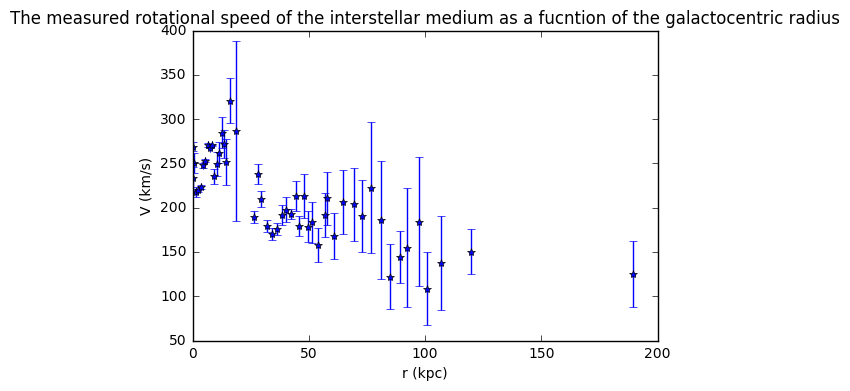

In [63]:
data_xerr = 0
plt.figure()
plt.errorbar(data_x,data_y,data_yerr,data_xerr,fmt='*')
plt.xlabel("r (kpc)")
plt.ylabel('V (km/s)')
plt.title("The measured rotational speed of the interstellar medium as a fucntion of the galactocentric radius")
plt.show()

### The log likelihood is meant to capture how well a model is able to reproduce the data that it is meant to simulate.

$log p(D|M, I) = constant* \prod_{i}^{} log(\sigma_i)  \sum_{i}{}(\frac{(v_{icalculated} - v_{imeasured})^2}{2 \sigma_i^2}) $

### The prior: 
By observing the data set, we discovered the rorational velocty increases as r increases from 0 kpc and reaches the maximum value at aorund r= 10 (kpc) and then decreases with a long tail. Therefore, we choose our prior to be the sum of a gaussian function and a polynomial decay function to be the prior.
  
 $  p(M|I)  = \exp (-(x-u)^2/{2\sigma^2})+ constant_1/x + constant_2 $
  

In [82]:
# It is a transformation from a space where variables are independently and uniformly distributed between 0 and 1 to the parameter space of interest. 
# x ranges in [0,1] 
def prior_transform(x):
    return np.exp(-(x-25)**2/6)+300/x +50

Therefore, we can calculated the posterior $ p(M|D,I) = \frac{p(M|I) p(D|M, I)}{p(D|I)} $ and compare the posterior by MCMC and/or Nestle to do model comparison. 

By using the Nestle package, it will give us log evidence, numerical (sampling) error on logz, array of sample parameters, array of weights associated with each sampleand result.weights. 